In [23]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv("/Users/daudkhan/Downloads/trainingandtestdata/training.csv",header=None, names=cols, encoding="latin1")
# above line will be different depending on where you saved your data, and your file name
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [22]:
import os
print(os.path.exists("/Users/daudkhan/Downloads/trainingandtestdata/training.csv"))

True


In [24]:
df.sentiment.value_counts()


sentiment
0    800000
4    800000
Name: count, dtype: int64

In [25]:
df.drop(['id','date','query_string','user'],axis=1,inplace=True)

In [26]:
df[df.sentiment == 0].head(10)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [29]:
df[df.sentiment == 4].head(10)

,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone
800005,4,@ProductOfFear You can tell him that I just bu...
800006,4,@r_keith_hill Thans for your response. Ihad al...
800007,4,"@KeepinUpWKris I am so jealous, hope you had a..."
800008,4,"@tommcfly ah, congrats mr fletcher for finally..."
800009,4,@e4VoIP I RESPONDED Stupid cat is helping me ...


In [30]:
df['pre_clean_len'] = [len(t) for t in df.text]

In [38]:
from pprint import pprint
data_dict = {
    'sentiment':{
        'type':df.sentiment.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'text':{
        'type':df.text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}
pprint(data_dict)

{'dataset_shape': (1600000, 3),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class - 0:negative, 1:positive',
               'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


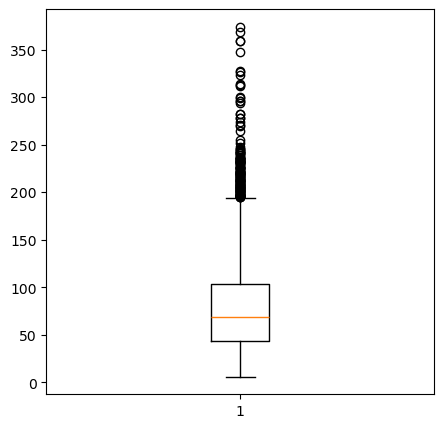

In [39]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [40]:
df[df.pre_clean_len > 140].head(10)

,sentiment,text,pre_clean_len
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
464,0,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
492,0,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
747,0,Have an invite for &quot;Healthy Dining&quot; ...,141
957,0,Damnit I was really digging this season of Rea...,141
1064,0,Why do I keep looking...I know that what I rea...,141


In [41]:
df.text[279]

"Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly. "

In [66]:
from bs4 import BeautifulSoup

example1 = BeautifulSoup(df.text[279], 'html.parser')  # Using built-in parser
print(example1.get_text())

Whinging. My client&boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&reviewed correctly. 


In [60]:
df.text[343]

'@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [61]:
import re
re.sub(r'@[A-Za-z0-9]+','',df.text[343])

' Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [62]:
df.text[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [63]:
re.sub('https?://[A-Za-z0-9./]+','',df.text[0])

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [64]:
df.text[226]

'Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [72]:
type(df.text[226])
testing = df.text[226].lstrip("\ufeff")

In [73]:
df.text[175]

"@machineplay I'm so sorry you're having to go through this. Again.  #therapyfail"

In [74]:
re.sub("[^a-zA-Z]","",df.text[175])

'machineplayImsosorryyourehavingtogothroughthisAgaintherapyfail'

In [77]:
from bs4 import BeautifulSoup
import re
from nltk.tokenize import WordPunctTokenizer

tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'html.parser')  # Use 'html.parser' if 'lxml' is unavailable
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    
    # No need for .decode(), directly use the string
    clean = stripped.replace(u"\ufffd", "?")
    
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()

    # Tokenize and remove unnecessary spaces
    words = tok.tokenize(lower_case)
    return " ".join(words).strip()

# Apply cleaning to first 100 texts
testing = df.text[:100]
test_result = [tweet_cleaner(t) for t in testing]

test_result  # This will contain the cleaned tweets

/var/folders/0p/dcgd0tb12_7d6gm7dznrtl6m0000gn/T/ipykernel_1294/1418939486.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')  # Use 'html.parser' if 'lxml' is unavailable


['awww that s a bummer you shoulda got david carr of third day to do it d',
 'is upset that he can t update his facebook by texting it and might cry as a result school today also blah',
 'i dived many times for the ball managed to save the rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 'no it s not behaving at all i m mad why am i here because i can t see you all over there',
 'not the whole crew',
 'need a hug',
 'hey long time no see yes rains a bit only a bit lol i m fine thanks how s you',
 'k nope they didn t have it',
 'que me muera',
 'spring break in plain city it s snowing',
 'i just re pierced my ears',
 'i couldn t bear to watch it and i thought the ua loss was embarrassing',
 'it it counts idk why i did either you never talk to me anymore',
 'i would ve been the first but i didn t have a gun not really though zac snyder s just a doucheclown',
 'i wish i got to watch it with you i miss you and how was the premiere',
 'hollis death scene will hurt

In [80]:
nums = [0, 400000, 800000, 1200000, 1600000]

print("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []

for i in range(nums[0], nums[1]):  # Use range() instead of xrange()
    if (i + 1) % 10000 == 0:
        print("Tweets %d of %d have been processed" % (i + 1, nums[1]))

    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 10000 of 400000 have been processed


/var/folders/0p/dcgd0tb12_7d6gm7dznrtl6m0000gn/T/ipykernel_1294/1418939486.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')  # Use 'html.parser' if 'lxml' is unavailable


Tweets 20000 of 400000 have been processed
Tweets 30000 of 400000 have been processed
Tweets 40000 of 400000 have been processed
Tweets 50000 of 400000 have been processed
Tweets 60000 of 400000 have been processed
Tweets 70000 of 400000 have been processed
Tweets 80000 of 400000 have been processed
Tweets 90000 of 400000 have been processed
Tweets 100000 of 400000 have been processed
Tweets 110000 of 400000 have been processed
Tweets 120000 of 400000 have been processed
Tweets 130000 of 400000 have been processed
Tweets 140000 of 400000 have been processed
Tweets 150000 of 400000 have been processed
Tweets 160000 of 400000 have been processed
Tweets 170000 of 400000 have been processed
Tweets 180000 of 400000 have been processed
Tweets 190000 of 400000 have been processed
Tweets 200000 of 400000 have been processed
Tweets 210000 of 400000 have been processed
Tweets 220000 of 400000 have been processed
Tweets 230000 of 400000 have been processed
Tweets 240000 of 400000 have been proces